In [1]:
import pandas as pd

In [2]:
!pip install pandas openpyxl

In [3]:
df = pd.read_excel("fetch_california_housing.xlsx")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


Визуализируем выбросы

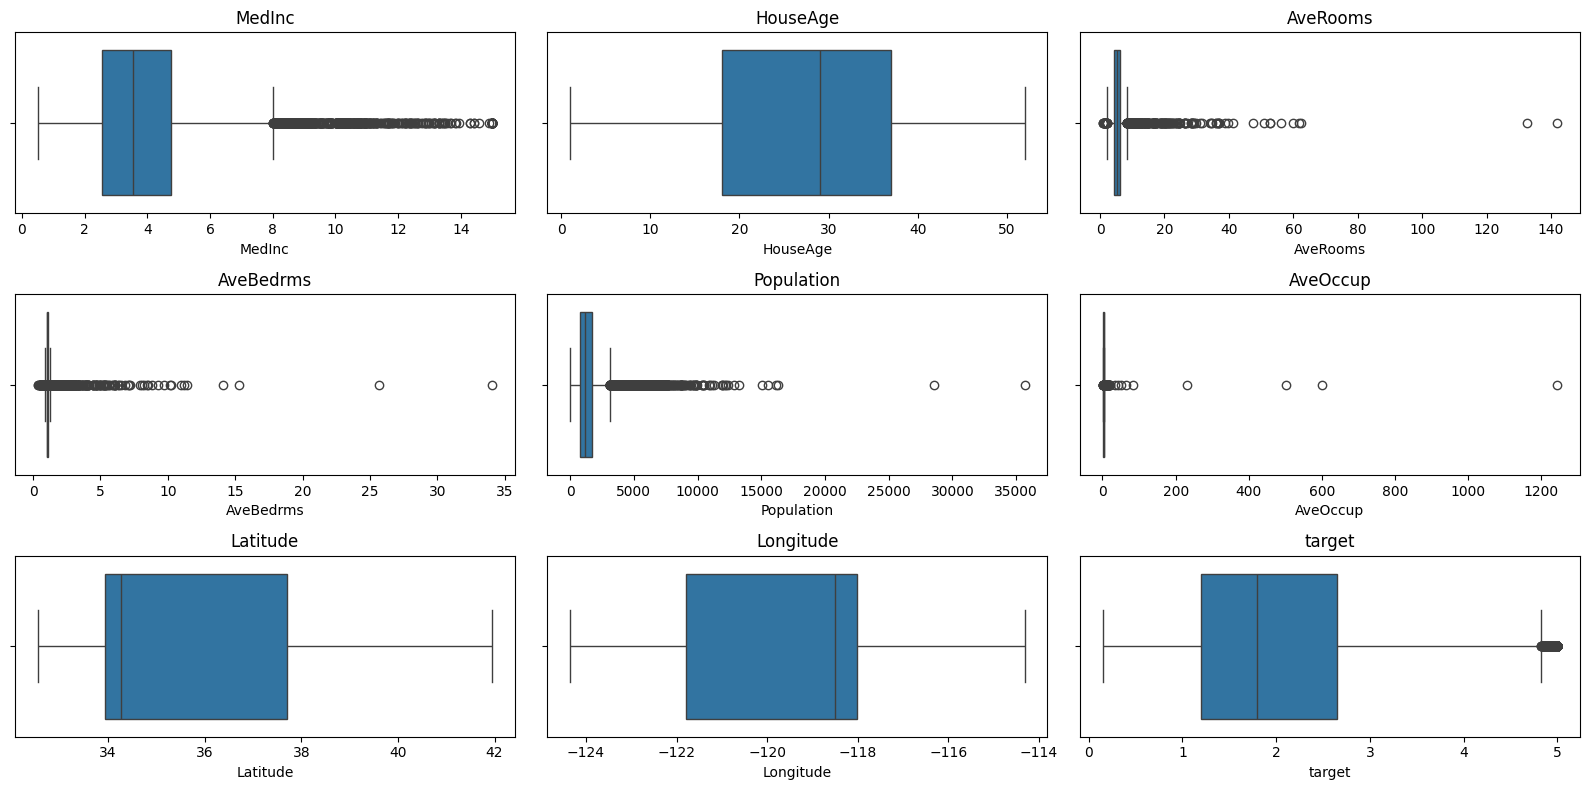

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i in range(9):
    sns.boxplot(x=df.iloc[:, i], ax=axes[i])
    axes[i].set_title(f"{df.columns[i]}")

plt.tight_layout()
plt.show()

In [6]:
import scipy.stats as stats

# Проверка нормальности для каждого столбца
for column in df.columns:
    _, p_val = stats.shapiro(df[column])
    
    if p_val <= 0.05:
        print(f"Столбец '{column}' далеки от нормальности (p-value = {p_val})")
    else:
        print(f"Столбец '{column}' нормально распределен (p-value = {p_val})")

Столбец 'MedInc' далеки от нормальности (p-value = 6.560004141577351e-79)
Столбец 'HouseAge' далеки от нормальности (p-value = 1.5602225615812071e-47)
Столбец 'AveRooms' далеки от нормальности (p-value = 5.987884604017823e-121)
Столбец 'AveBedrms' далеки от нормальности (p-value = 1.0642657909747694e-131)
Столбец 'Population' далеки от нормальности (p-value = 1.7444774799025636e-102)
Столбец 'AveOccup' далеки от нормальности (p-value = 2.483028933180071e-136)
Столбец 'Latitude' далеки от нормальности (p-value = 4.495161061285843e-82)
Столбец 'Longitude' далеки от нормальности (p-value = 4.1213064328229244e-78)
Столбец 'target' далеки от нормальности (p-value = 1.3673019915894195e-74)


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


Распределение не нормальное! применять z-индекс неправильно! применим IQR


In [7]:
# from scipy import stats

# threshold = 3

# for name,column in df.iloc[:,:9].items():
#     z_scores = stats.zscore(column)
#     median_value = column.median()
#     df.loc[abs(z_scores) > threshold, name] = median_value

In [8]:
# # Шаг 1: Вычисление Q1, Q3 и IQR
# Q1 = df.iloc[:, :8].quantile(0.25)  # 25-й перцентиль (Q1)
# Q3 = df.iloc[:, :8].quantile(0.75)  # 75-й перцентиль (Q3)
# IQR = Q3 - Q1  # Межквартильный размах

# # Шаг 2: Определение выбросов
# lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
# upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

# # Шаг 3: Замена выбросов на медиану
# for column in df.iloc[:, :8].columns:
#     # Заменяем выбросы на медиану столбца
#     df[column] = df[column].mask((df[column] < lower_bound[column]) | (df[column] > upper_bound[column]), df[column].median())


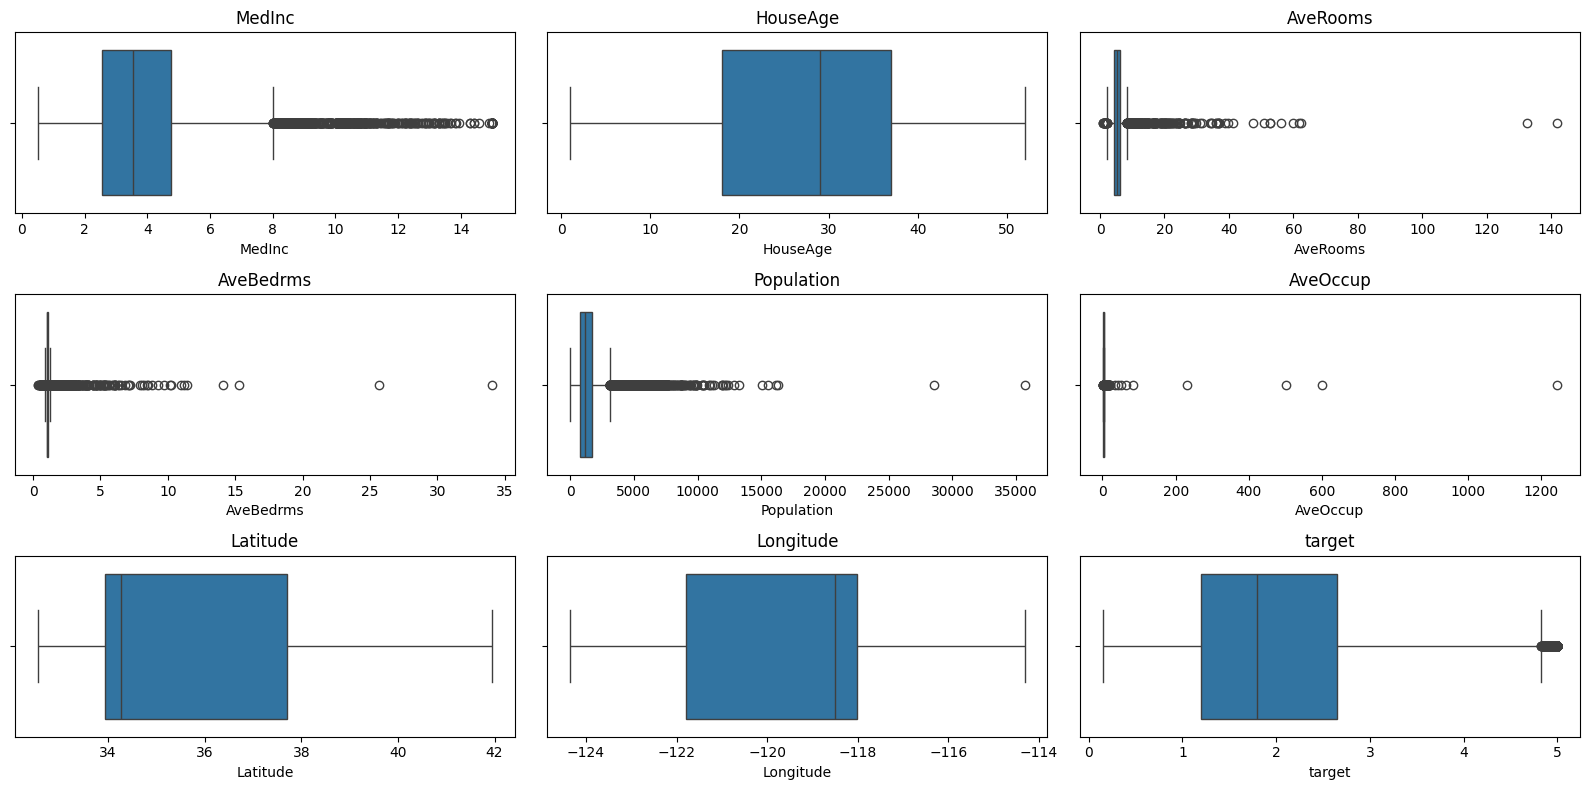

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i in range(9):
    sns.boxplot(x=df.iloc[:, i], ax=axes[i])
    axes[i].set_title(f"{df.columns[i]}")

plt.tight_layout()
plt.show()

Мы убрали выбросы! Мы просто офигенно убрали выбросы! Z-индекс плохо работал и раньше, а я этого и не знал! Раньше данные тоже были ненормальные! Теперь то мы осилим любые модели! Хотя в случае лесов выбросы и так не страшны!
Теперь построим матрицу корреляций и тепловую карту


<Axes: >

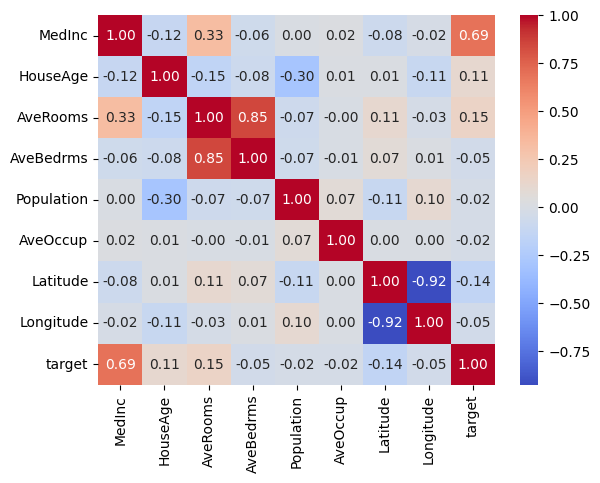

In [10]:
m_corr=df.corr()
sns.heatmap(m_corr,annot=True,fmt='.2f',cmap='coolwarm')

Ха! Видим, что дорогие дома прямо связаны богатыми людьми! Состоятельные чуваки не живут в тесных конурках, а занимают 7 комнат и хотят иметь 8 - под библиотеку! Т.е. прямая связь величины дохода и числа комнат. Бросается в глаза сильная обратная зависимость широты и долготы, что вероятно связано с географическими особенностями расположения региона - с северо-востока на юго-запад простирается или типтого. 

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:7], df.iloc[:,8], test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

print(f"R2 Score: {rf.score(X_test, y_test):.2f}")

R2 Score: 0.73


С устранением выбросов с помощью IQR я получил 0.72, а без - 0.73

In [12]:
importances = rf.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

      Feature  Importance
0      MedInc    0.543085
5    AveOccup    0.150519
6    Latitude    0.088496
1    HouseAge    0.069460
2    AveRooms    0.060761
4  Population    0.044665
3   AveBedrms    0.043015


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42)

gbr.fit(X_train, y_train)

print(f"R2 Score: {gbr.score(X_test, y_test):.2f}")

R2 Score: 0.74


С устранением выбросов с помощью IQR я получил 0.7
Я увеличил n_estimators от 100 до 1000, max_depth с 3 до 5 и получил прирост точности на 0.04 т.е. 0.74

In [14]:
importances = gbr.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

      Feature  Importance
0      MedInc    0.561098
5    AveOccup    0.157006
6    Latitude    0.094288
1    HouseAge    0.068006
2    AveRooms    0.052507
3   AveBedrms    0.034786
4  Population    0.032310


Ради интереса проведем кросс-валидацию

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Кросс-валидация (R² в качестве метрики)
cv_scores_rf = cross_val_score(rf, df.iloc[:,:7], df.iloc[:,8], cv=5, scoring='r2')
cv_scores_gb = cross_val_score(gbr, df.iloc[:,:7], df.iloc[:,8], cv=5, scoring='r2')

print("RandomForestRegressor Cross-Validation R²:", np.mean(cv_scores_rf))
print("GradientBoostingRegressor Cross-Validation R²:", np.mean(cv_scores_gb))

RandomForestRegressor Cross-Validation R²: 0.559889277317826
GradientBoostingRegressor Cross-Validation R²: 0.4802901964273357


Оценим качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации)

In [17]:
y_pred_rf = rf.predict(X_test)
y_pred_gb = gbr.predict(X_test)

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# R²
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print("RandomForestRegressor RMSE:", rmse_rf)
print("RandomForestRegressor R²:", r2_rf)
print("GradientBoostingRegressor RMSE:", rmse_gb)
print("GradientBoostingRegressor R²:", r2_gb)

RandomForestRegressor RMSE: 0.5929688507772904
RandomForestRegressor R²: 0.7321132848444704
GradientBoostingRegressor RMSE: 0.5789963378754903
GradientBoostingRegressor R²: 0.7445893216691171


Вывод: по важности признаки распределились согласно тепловой карте! Лидирует доход граждан - состоятельные граждане живут в дорогих районах. Изменение доступных параметров, таких как количество деревьев и глубина деревьев сильно не влияют на показания! Ансабли деревьев показали действительно высокую устойчивость к выбросам - выбросы даже в некотой мере увиличили точность предсказаний! Настораживает относительно высокий RMSE и следовательно относительно высокое отклонение предсказаний от реальности!Значительной разницы в точности предсказаний между ансамблями (RandomForestRegressor и GradientBoostingRegressor) нет!